In [45]:
#importing the necessary libraries
import pandas as pd
import numpy as np

In [46]:
#reading the data
df1 = pd.read_csv("cab_rides.csv")
df2 = pd.read_csv("weather.csv")

In [47]:
# viewing the first five rows
df1.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [48]:
# viewing the first five rows
df2.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [49]:
#changing date time
df1['date_time'] = pd.to_datetime(df1['time_stamp']/1000, unit='s')
df2['date_time'] = pd.to_datetime(df2['time_stamp'], unit='s')
df1.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000128
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.676999936
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999872
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000192
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000064


In [50]:
#merge the datasets to refelect same time for a location
df1['merge_date'] = df1.source.astype(str) +" - "+ df1.date_time.dt.date.astype("str") +" - "+ df1.date_time.dt.hour.astype("str")
df2['merge_date'] = df2.location.astype(str) +" - "+ df2.date_time.dt.date.astype("str") +" - "+ df2.date_time.dt.hour.astype("str")

In [51]:
#previewing the index
df2.index = df2['merge_date']

In [52]:
df1.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,merge_date
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000128,Haymarket Square - 2018-12-16 - 9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.676999936,Haymarket Square - 2018-11-27 - 2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999872,Haymarket Square - 2018-11-28 - 1
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000192,Haymarket Square - 2018-11-30 - 4
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000064,Haymarket Square - 2018-11-29 - 3


In [53]:
merged_df = df1.join(df2,on=['merge_date'],rsuffix ='_w')

In [54]:
merged_df['rain'].fillna(0,inplace=True)

In [55]:
merged_df = merged_df[pd.notnull(merged_df['date_time_w'])]

In [56]:
merged_df = merged_df[pd.notnull(merged_df['price'])]

In [57]:
merged_df['day'] = merged_df.date_time.dt.dayofweek

In [58]:
merged_df['hour'] = merged_df.date_time.dt.hour

In [59]:
merged_df['day'].describe()


count    1.164996e+06
mean     2.388427e+00
std      1.743907e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      6.000000e+00
Name: day, dtype: float64

In [60]:
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time',
       'merge_date', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp_w', 'humidity', 'wind', 'date_time_w', 'merge_date_w',
       'day', 'hour'],
      dtype='object')

In [61]:
merged_df.count()

distance            1164996
cab_type            1164996
time_stamp          1164996
destination         1164996
source              1164996
price               1164996
surge_multiplier    1164996
id                  1164996
product_id          1164996
name                1164996
date_time           1164996
merge_date          1164996
temp                1164996
location            1164996
clouds              1164996
pressure            1164996
rain                1164996
time_stamp_w        1164996
humidity            1164996
wind                1164996
date_time_w         1164996
merge_date_w        1164996
day                 1164996
hour                1164996
dtype: int64

## Visualizations

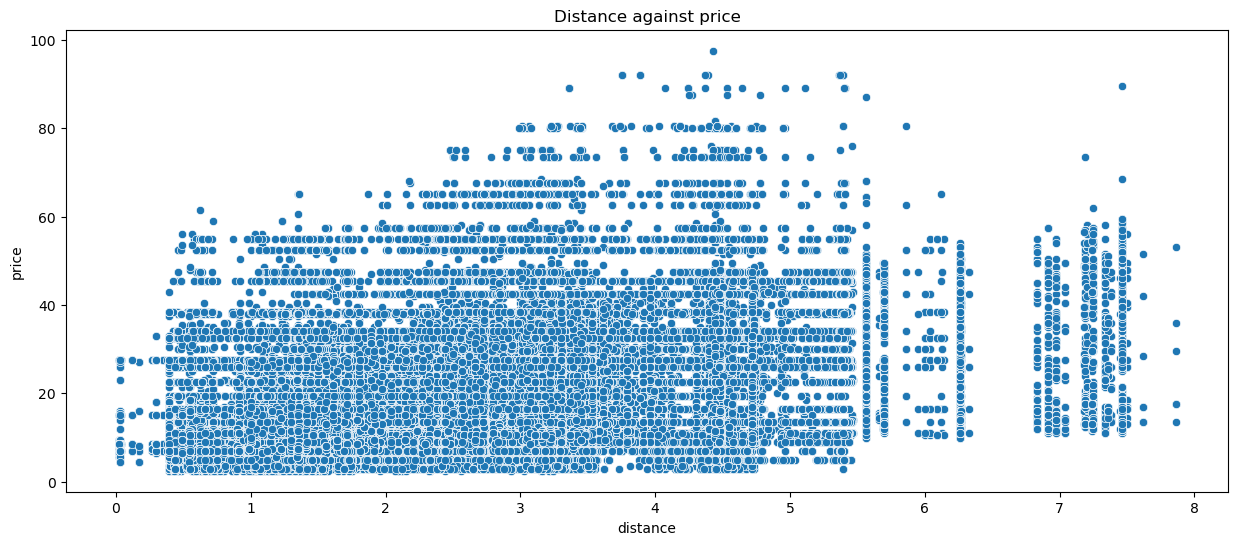

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
ax = sns.scatterplot(x='distance',y='price',data=merged_df)
ax.set_title("Distance against price")
ax.set_xlabel('distance')
ax.set_ylabel('price');

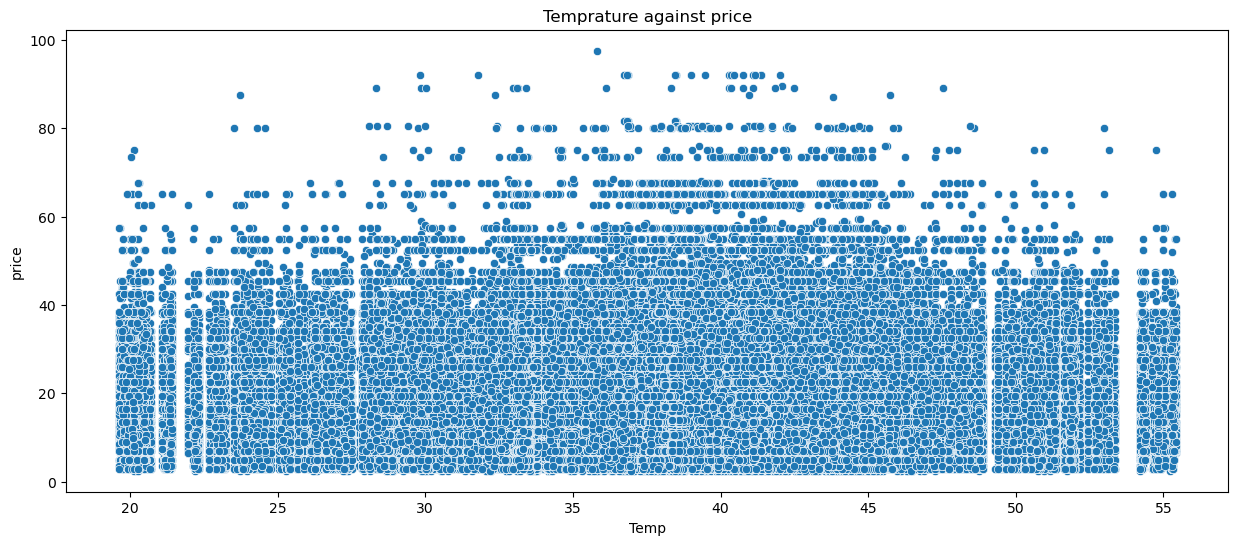

In [63]:
plt.figure(figsize=(15, 6))
ax = sns.scatterplot(x='temp',y='price',data=merged_df)
ax.set_title("Temprature against price")
ax.set_xlabel('Temp')
ax.set_ylabel('price');

<Axes: xlabel='price', ylabel='temp'>

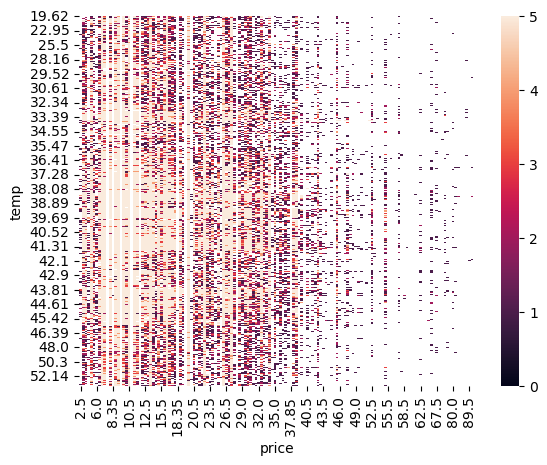

In [64]:
# assuming you have a DataFrame called df with columns 'temperature' and 'price'
heatmap_data = merged_df.groupby(['temp', 'price']).size().reset_index(name='count')
heatmap_data = heatmap_data.pivot('temp', 'price', 'count')
sns.heatmap(heatmap_data, vmin=0, vmax=5)

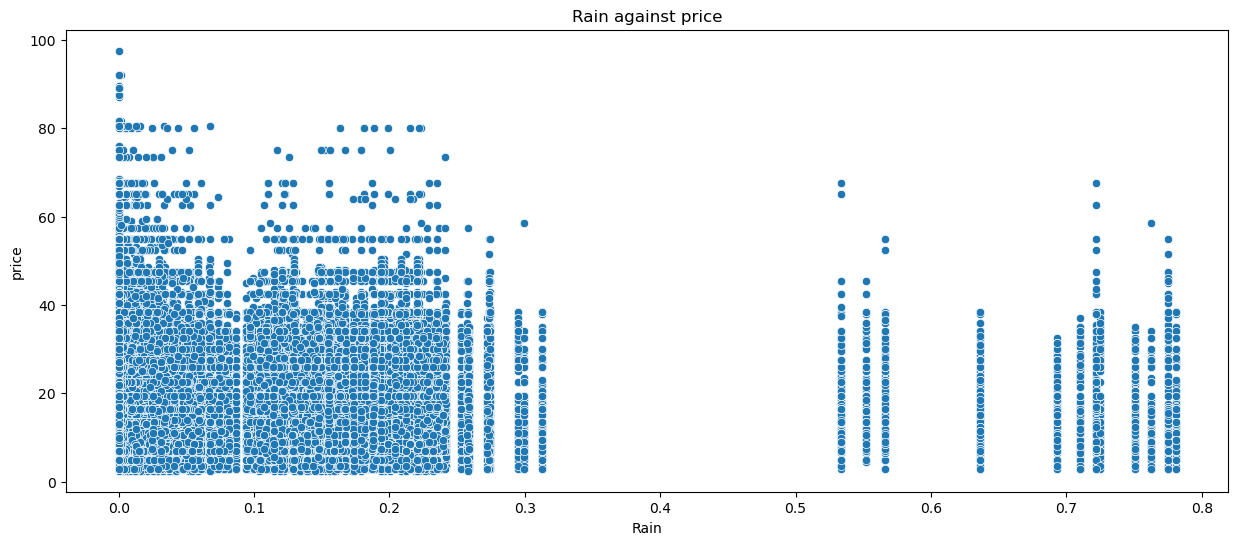

In [65]:
plt.figure(figsize=(15, 6))
ax = sns.scatterplot(x='rain',y='price',data=merged_df)
ax.set_title("Rain against price")
ax.set_xlabel('Rain')
ax.set_ylabel('price');

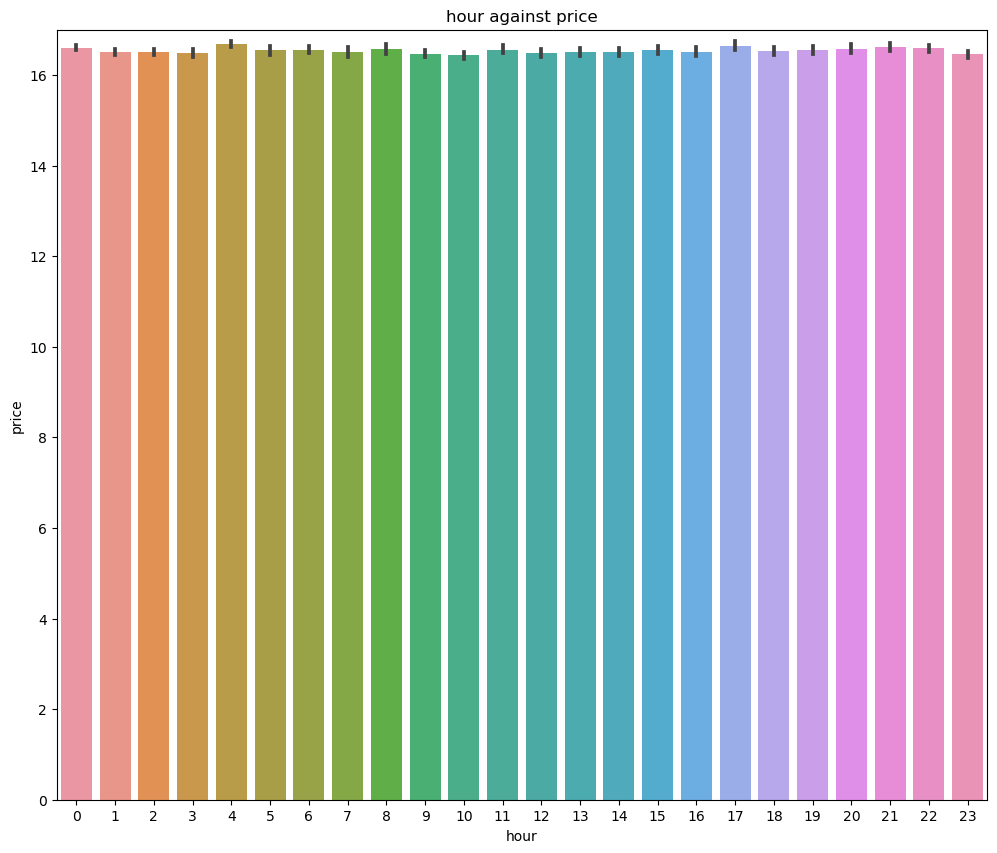

In [66]:
plt.figure(figsize=(12, 10))
plt.ylim(0, 17, 1)
ax = sns.barplot(x='hour',y='price',data=merged_df)
ax.set_title("hour against price")
ax.set_xlabel('hour')
ax.set_ylabel('price');

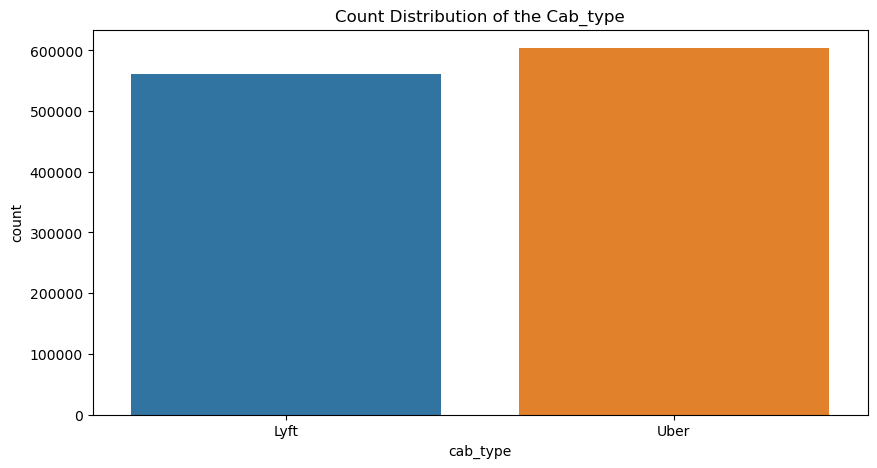

In [67]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(x='cab_type', data=merged_df)
ax.set_title('Count Distribution of the Cab_type');

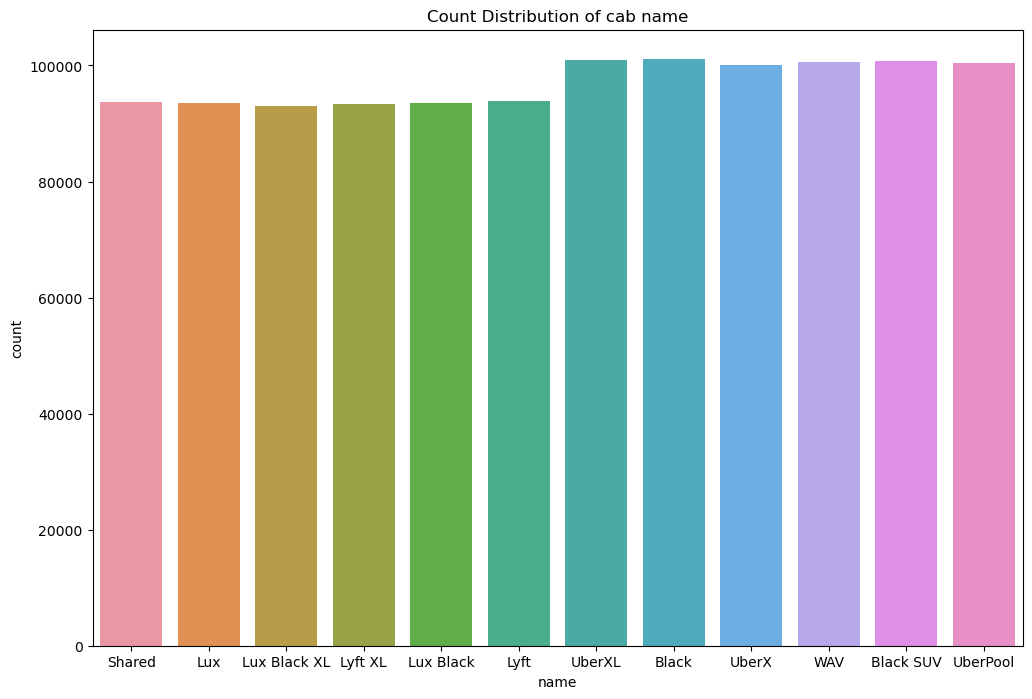

In [68]:
plt.figure(figsize=(12, 8))
ax=sns.countplot(x='name', data=merged_df)
ax.set_title('Count Distribution of cab name');

In [69]:
X = merged_df[['day','distance','cab_type','name','surge_multiplier', 'hour','temp','clouds', 'pressure','humidity', 'wind', 'rain']]

# X = merged_df[merged_df.cab_type=='lyft'][['day','distance','hour','temp','clouds', 'pressure','humidity', 'wind', 'rain']]

In [70]:
X.count()

day                 1164996
distance            1164996
cab_type            1164996
name                1164996
surge_multiplier    1164996
hour                1164996
temp                1164996
clouds              1164996
pressure            1164996
humidity            1164996
wind                1164996
rain                1164996
dtype: int64

In [71]:
y = merged_df['price'] 
y.count()

1164996

In [72]:
X.reset_index(inplace=True)
X = X.drop(columns=['index'])

In [73]:
X.head(10)

,day,distance,cab_type,name,surge_multiplier,hour,temp,clouds,pressure,humidity,wind,rain
0,6,0.44,Lyft,Shared,1.0,9,38.46,0.29,1022.25,0.76,7.68,0.0000
1,1,0.44,Lyft,Lux,1.0,2,44.31,1.00,1003.17,0.90,13.69,0.1123
2,1,0.44,Lyft,Lux,1.0,2,43.82,0.99,1002.59,0.89,11.57,0.0997
3,4,0.44,Lyft,Lux Black XL,1.0,4,35.08,0.00,1013.71,0.70,5.25,0.0000
4,3,0.44,Lyft,Lyft XL,1.0,3,37.58,0.42,998.64,0.71,11.30,0.0000
5,3,0.44,Lyft,Lyft XL,1.0,3,37.80,0.47,998.20,0.70,11.02,0.0000
6,3,0.44,Lyft,Lyft XL,1.0,3,37.66,0.41,998.42,0.71,11.16,0.0000
7,0,0.44,Lyft,Lux Black,1.0,18,40.78,0.93,1000.15,0.79,7.55,0.0000
8,0,1.08,Lyft,Lyft XL,1.0,5,40.65,0.93,1013.76,0.92,3.01,0.0000
9,0,1.08,Lyft,Lyft XL,1.0,5,40.39,0.92,1013.79,0.93,2.71,0.0000


In [74]:
features = pd.get_dummies(X, dtype=float)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164996 entries, 0 to 1164995
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   day                1164996 non-null  int64  
 1   distance           1164996 non-null  float64
 2   surge_multiplier   1164996 non-null  float64
 3   hour               1164996 non-null  int64  
 4   temp               1164996 non-null  float64
 5   clouds             1164996 non-null  float64
 6   pressure           1164996 non-null  float64
 7   humidity           1164996 non-null  float64
 8   wind               1164996 non-null  float64
 9   rain               1164996 non-null  float64
 10  cab_type_Lyft      1164996 non-null  float64
 11  cab_type_Uber      1164996 non-null  float64
 12  name_Black         1164996 non-null  float64
 13  name_Black SUV     1164996 non-null  float64
 14  name_Lux           1164996 non-null  float64
 15  name_Lux Black     1164996 non-n

In [75]:
#assigning X variable.
X_tree= features[['rain', 'clouds']]
X_tree

,rain,clouds
0,0.0000,0.29
1,0.1123,1.00
2,0.0997,0.99
3,0.0000,0.00
4,0.0000,0.42
...,...,...
1164991,0.0000,0.41
1164992,0.0000,0.41
1164993,0.0000,0.41
1164994,0.0000,0.41


## Modeling using Decision Tree Regressor.

In [76]:
#checking for missing values
y.isna().sum()

0

In [77]:

#importing modules and training the data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
#assigning our train and test data variables
X_train, X_test, y_train, y_test= train_test_split(X_tree, y, test_size=0.25, random_state=42)

In [78]:
# Instantiate and fit a regression tree model to training data 
tree= DecisionTreeRegressor(random_state=42, max_depth=5)
#fitting the data
tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [79]:
# checking the metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Make predictions and evaluate 
y_pred = tree.predict(X_test)
print('MSE score:', mse(y_test, y_pred))
print('R-sq score:', r2_score(y_test,y_pred))

MSE score: 86.60382672741198
R-sq score: 0.00021189812302713218


from the above metrics:
* MSE- measure of the average squared difference between the predicted values and the actual values. We can tune the model to see if we can get a smaller MSE score.

* The R-squared score is a measure of how well the model fits the data. A high R-squared score indicates that the model fits the data well, while a low R-squared score indicates that the model does not fit the data well. Our model doesnt fit the data well.


### Scaling the Data

In [80]:
#importing modules
from sklearn.preprocessing import StandardScaler
#creating an instance
scaler= StandardScaler()
#fitting the data
sld_train= scaler.fit_transform(X_train)
sld_test= scaler.transform(X_test)

In [81]:
#creating an instant of decision tree
tree_2= DecisionTreeRegressor(random_state=42, max_depth=2)
#fitting the data
tree_2.fit(sld_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [82]:
#making predictions
y_pred2 = tree_2.predict(sld_test)
# metrics for evaluating the tree
print('MSE score:', mse(y_test, y_pred2))
print('R-sq score:', r2_score(y_test,y_pred2))

MSE score: 86.61431001764639
R-sq score: 9.08749622622329e-05


After scaling the data, the mean squared remained the same while the r squared decreased abit there is still room for model improvement.

### GridSearchCV

In [83]:
#importing the gridsearch
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
tree_3 = DecisionTreeRegressor()
#defining the parameters for gridsearch
param_grid= {
    'max_depth':[1,2,3,4,5],
    'min_samples_split':[1,2,3,4,5],
    'min_samples_leaf': [1,2,3,4,5]

    }
#creating instance of gridsearch
grid= GridSearchCV(tree_3, param_grid, cv=5)
#fitting  the data
grid.fit(sld_train, y_train)
#printing the parameters and score
print(f'Best parameters:{grid.best_params_}')
print(f'Best score:{grid.best_score_}');

Best parameters:{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:0.00021790264636800671


The best parameters to use are:
* max_depth = 5
* min_samples_leaf =1
* min_samples_split = 2

In [84]:
#final model with best parameters
#creating an instance of tree
tree_4= DecisionTreeRegressor(max_depth=5, min_samples_leaf=1, min_samples_split=2)
#fitting the data
tree_4.fit(sld_train, y_train)


DecisionTreeRegressor(max_depth=5)

In [85]:
#performing the predictons on test data
y_pred3 = tree_4.predict(sld_test)
print('MSE score:', mse(y_test, y_pred3))
print('R-sq score:', r2_score(y_test,y_pred3))

MSE score: 86.60382672741198
R-sq score: 0.00021189812302713218


Using the best parameters, we can see:
* The MSE score remained the same
* The R_squared also remained the same as our first decision tree model.

In [86]:
# getting the feature importance
importance= tree_4.feature_importances_
#creating a list of feature names
feature_names= list(X_train.columns)
#sorting feature importance in descending order
sort_importances= sorted(list(zip(feature_names, importance)),key=lambda x:x[1],reverse=True)
#printing feature importance
print(f'{importance}:{sort_importances}')

[0.64781448 0.35218552]:[('rain', 0.6478144776256883), ('clouds', 0.3521855223743116)]


From the above cell we can see that:
* When it is raining and cloudy that is [rain: 0.61, clouds:0.38], it has an effect on the price meaning that the price will go up.


These two features have an effect on the price

#### Visualization of feature importance

Feature importances:
1. feature 0 (0.647814)
2. feature 1 (0.352186)


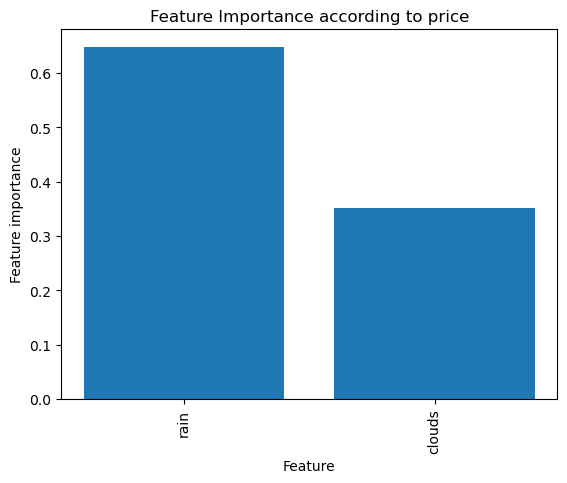

In [93]:
# sort the features by their importance scores
sorted_indices = np.argsort(importance)[::-1]

# Print the feature importance scores
print("Feature importances:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, sorted_indices[f], importance[sorted_indices[f]]))

# Plot the feature importance scores
plt.bar(range(X_train.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.title('Feature Importance according to price')
plt.ylabel("Feature importance")
plt.xlabel("Feature")
plt.show()
